# 基本語法：基本上全部都是向量和矩陣（張量）的預算

## run Session一定要記得init變量們！！

In [1]:
import tensorflow as tf

ts_c = tf.constant(2,name='ts_c')
ts_x = tf.Variable(ts_c+5,name='ts_x')

#開啟Session，init變量
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

print('ts_c=',sess.run(ts_c))
print('ts_x=',sess.run(ts_x))

sess.close() #記得關掉

ts_c= 2
ts_x= 7


In [6]:
import tensorflow as tf
ts_c = tf.constant(2,name='ts_c')
ts_x = tf.Variable(ts_c+5,name='ts_x')

#使用with就不用關掉了
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    print('ts_c=',sess.run(ts_c))
    print('ts_x=',sess.run(ts_x))

ts_c= 2
ts_x= 7


## placeholoder 先做出模型，再讓張量流過去(tensorflow)

使用feed_dict的格式填入變數的值

In [5]:
width = tf.placeholder("int32")
height = tf.placeholder("int32")
area = tf.multiply(width,height)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    print('area=',sess.run(area,feed_dict={width: 6, height: 8}))

area= 48


## tensor 1 dim

In [4]:
ts_X = tf.Variable([0.4,0.2,0.4]) #一層中括號代表一維！！

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    X=sess.run(ts_X)
    print(X)

[ 0.40000001  0.2         0.40000001]


In [7]:
X.shape

(3,)

## tensor 2 dim

In [8]:
ts_X = tf.Variable([[0.4,0.2,0.4]]) #兩層中括號就代表是二維！！

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    X=sess.run(ts_X)
    print(X)

[[ 0.40000001  0.2         0.40000001]]


In [10]:
X.shape

(1, 3)

In [12]:
ts_X = tf.Variable([[0.4,0.2,0.4],
                    [0.5,0.7,0.2]]) #兩層中括號就代表是二維！！

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    X=sess.run(ts_X)
    print(X)

[[ 0.40000001  0.2         0.40000001]
 [ 0.5         0.69999999  0.2       ]]


In [13]:
X.shape

(2, 3)

## 矩陣相乘

In [14]:
X = tf.Variable([[1.,1.,1.]]) #1x3

W = tf.Variable([[-0.5,-0.2 ], #3x2
                 [-0.3, 0.4 ],
                 [-0.5, 0.2 ]])
                        
XW =tf.matmul(X,W) #結果應該為1x2
                       
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    print(sess.run(XW)) #果然是1x2矩陣

[[-1.29999995  0.40000001]]


## 矩陣相加 

In [15]:
b = tf.Variable([[ 0.1,0.2]])
XW =tf.Variable([[-1.3,0.4]])

Sum =XW+b
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    print('Sum:')    
    print(sess.run(Sum ))

Sum:
[[-1.19999993  0.60000002]]


## 單一無激活神經元層運作: y= (W,X) + b

In [2]:
import tensorflow as tf
import numpy as np

X = tf.Variable([[1.,1.,1.]])

W = tf.Variable([[-0.5,-0.2 ],
                 [-0.3, 0.4 ],
                 [-0.5, 0.2 ]])
                         

b = tf.Variable([[0.1,0.2]])
    
XWb =tf.matmul(X,W)+b


with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    print('XWb:')    
    print(sess.run(XWb))

XWb:
[[-1.19999993  0.60000002]]


# y = relu( (W,X) + b )

In [3]:
import tensorflow as tf
import numpy as np

X = tf.Variable([[0.4,0.2,0.4]])

W = tf.Variable([[-0.5,-0.2 ],
                 [-0.3, 0.4 ],
                 [-0.5, 0.2 ]])
                         
b = tf.Variable([[0.1,0.2]])
    
XWb =tf.matmul(X,W)+b

y=tf.nn.relu(tf.matmul(X,W)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    print('XWb:')    
    print(sess.run(XWb ))    
    print('y:')    
    print(sess.run(y ))

XWb:
[[-0.35999998  0.28      ]]
y:
[[ 0.    0.28]]


# y = sigmoid( (W,X) + b )

In [4]:
import tensorflow as tf
import numpy as np

X = tf.Variable([[0.4,0.2,0.4]])

W = tf.Variable([[-0.5,-0.2 ],
                 [-0.3, 0.4 ],
                 [-0.5, 0.2 ]])
                         
b = tf.Variable([[0.1,0.2]])
    
XWb =tf.matmul(X,W)+b

y=tf.nn.sigmoid(tf.matmul(X,W)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    print('XWb:')    
    print(sess.run(XWb ))    
    print('y:')    
    print(sess.run(y ))

XWb:
[[-0.35999998  0.28      ]]
y:
[[ 0.41095957  0.56954622]]


# 以亂數產生Weight(W)與bais(b) 

In [5]:
import tensorflow as tf
import numpy as np

X = tf.Variable([[0.4,0.2,0.4]]) #1x3
W = tf.Variable(tf.random_normal([3, 4])) #3x4
b = tf.Variable(tf.random_normal([1, 4])) #1x4
    
XWb =tf.matmul(X,W)+b

y=tf.nn.sigmoid(tf.matmul(X,W)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    print('XWb:')    
    print(sess.run(XWb ))    
    print('y:')    
    print(sess.run(y ))

XWb:
[[-0.94103545 -0.19624197 -1.43050456  0.02350724]]
y:
[[ 0.28069124  0.45109639  0.19302008  0.50587654]]


# Placeholder 加上 亂數W, b

In [6]:
# X維度是1x3

W = tf.Variable(tf.random_normal([3, 4]))
b = tf.Variable(tf.random_normal([1, 4]))

X = tf.placeholder("float", [None,3]) #nx3

y=tf.nn.relu(tf.matmul(X,W)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    X_array = np.array([[0.4,0.2,0.4]])
    (_b,_W,_X,_y)=sess.run((b,W,X,y),feed_dict={X:X_array}) #只需要feed X，其他都包裝好了
    
    print('b:')
    print(_b)    
    print('W:')
    print(_W)
    print('X:')
    print(_X)
    print('y:')
    print(_y)

b:
[[ 0.52626228 -0.12628986  0.86360776  0.34761906]]
W:
[[-0.30435893 -0.52809989 -0.97243261 -2.41669965]
 [-0.37699962  0.71462435  1.69191372  0.57962149]
 [ 0.75271809  1.11475492 -0.59023786 -1.30476356]]
X:
[[ 0.40000001  0.2         0.40000001]]
y:
[[ 0.63020599  0.251297    0.5769223   0.        ]]


In [7]:
ts_norm = tf.random_normal([1000])
with tf.Session() as session:
    norm_data=ts_norm.eval()
print(len(norm_data))
print(norm_data[:30])

1000
[-0.27391231  0.89868158 -0.34509102 -2.44910693  0.46767321  0.23288742
  0.16783336 -0.31754726 -0.5609262  -0.14726901  0.69067568 -0.53074038
  0.4618527   1.26630211 -0.26246893 -0.7228418   0.42280659  0.06118865
  0.40003428  1.62991965 -1.1498239  -0.51341015 -0.10593808 -0.2603403
 -1.69936824 -0.2910226  -1.18126643  0.16013452 -1.13885581 -1.21241951]


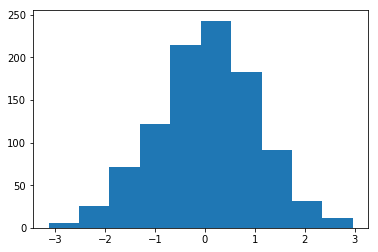

In [8]:
import matplotlib.pyplot as plt
plt.hist(norm_data)
plt.show()    

In [9]:
# X維度是3x3
W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([1, 2]))
X = tf.placeholder("float", [None,3])
y=tf.nn.sigmoid(tf.matmul(X,W)+b)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    X_array = np.array([[0.4,0.2 ,0.4],
                        [0.3,0.4 ,0.5],
                        [0.3,-0.4,0.5]])    
    (_b,_W,_X,_y)=sess.run((b,W,X,y),feed_dict={X:X_array})
    
    print('b:')
    print(_b)    
    print('W:')
    print(_W)
    print('X:')
    print(_X)
    print('y:')
    print(_y)

b:
[[-0.89578605  1.02302504]]
W:
[[-0.84239441 -0.42819193]
 [ 1.61024034  0.26591325]
 [ 1.62706041 -2.04730439]]
X:
[[ 0.40000001  0.2         0.40000001]
 [ 0.30000001  0.40000001  0.5       ]
 [ 0.30000001 -0.40000001  0.5       ]]
y:
[[ 0.4353953   0.52148902]
 [ 0.57667089  0.49432039]
 [ 0.2730763   0.44140792]]


# 正式定義神經層！

In [10]:
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim])) #rand: in x out 
    b = tf.Variable(tf.random_normal([1, output_dim])) #rand: 1 x out
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [11]:
X = tf.placeholder("float", [None,4])

y = layer(output_dim=3,input_dim=4,inputs=X,  # 3x4
          activation=tf.nn.relu)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    #X一定是是 nx4維度才能符合上面運作
    X_array = np.array([[0.4,0.2 ,0.4,0.1],
                        [0.3,0.4 ,0.5,0.3],
                        [0.3,-0.4,0.5,0.2]])    
    (_X,_y)= sess.run((X,y), feed_dict={X:X_array})
    
    print('X:')
    print(_X) #X的樣子
    print('y:')
    print(_y) #y的output

X:
[[ 0.40000001  0.2         0.40000001  0.1       ]
 [ 0.30000001  0.40000001  0.5         0.30000001]
 [ 0.30000001 -0.40000001  0.5         0.2       ]]
y:
[[ 0.44149762  0.          0.        ]
 [ 0.50783324  0.          0.03453216]
 [ 0.          0.          0.        ]]


In [13]:
X = tf.placeholder("float", [None,4])
h = layer(output_dim=3,input_dim=4,inputs=X, activation=tf.nn.relu)
y = layer(output_dim=2,input_dim=3,inputs=h)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    X_array = np.array([[0.4,0.2 ,0.4,0.5]])    
    (layer_X,layer_h,layer_y) = sess.run((X,h,y),feed_dict={X:X_array})
    
    print('input Layer X:')
    print(layer_X) #layer所獲得的output
    print('hidden Layer h:')
    print(layer_h) #layer所獲得的output
    print('output Layer y:')
    print(layer_y) #layer所獲得的output

input Layer X:
[[ 0.40000001  0.2         0.40000001  0.5       ]]
hidden Layer h:
[[ 0.          1.28631115  1.15463614]]
output Layer y:
[[-0.77611375  5.66346598]]


# Debug，回溯神經元層的Output和參數們（W, b）！！

In [14]:
#原本的神經層只會回傳Output
#這個dubug用的會回傳Output, W 和 b

def layer_debug(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs,W,b

In [15]:
#這個dubug用的會回傳Output, W 和 b
X = tf.placeholder("float", [None,4])
h, W1, b1 = layer_debug(output_dim=3,input_dim=4,inputs=X, activation=tf.nn.relu)
y, W2, b2 = layer_debug(output_dim=2,input_dim=3,inputs=h)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    X_array = np.array([[0.4, 0.2, 0.4, 0.5]])    
    (layer_X,layer_h,layer_y,W1,b1,W2,b2) = sess.run((X,h,y,W1,b1,W2,b2),feed_dict={X:X_array})
    
    print('input Layer X:')
    print(layer_X) 
    print('W1:')
    print(  W1)    
    print('b1:')
    print(  b1)    
    print('hidden Layer h:')
    print(layer_h)    
    print('W2:')
    print(  W2)    
    print('b2:')
    print(  b2)    
    print('output Layer y:')
    print(layer_y)

input Layer X:
[[ 0.40000001  0.2         0.40000001  0.5       ]]
W1:
[[ -9.88278687e-01   1.51206136e+00   5.92093050e-01]
 [  2.17260391e-01  -6.09053493e-01   3.10589933e+00]
 [ -7.28750527e-01   4.96300571e-02  -5.63648880e-01]
 [ -1.79390645e+00  -2.24799104e-03  -4.52206910e-01]]
b1:
[[-0.93255407  0.97652829 -2.02141666]]
hidden Layer h:
[[ 0.          1.47827005  0.        ]]
W2:
[[ 0.97075099  0.64354968]
 [-0.669052    0.68345618]
 [ 0.02815941 -0.38623917]]
b2:
[[ 1.53139627 -0.1617934 ]]
output Layer y:
[[ 0.54235673  0.84853941]]
